In [1]:
import numpy as np
import pandas as pd 
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
df = pd.read_csv('C:\\Users\\m1568006\\Desktop\\Test_venv\\.venv\\playlist_2010to2022.csv')

<Axes: >

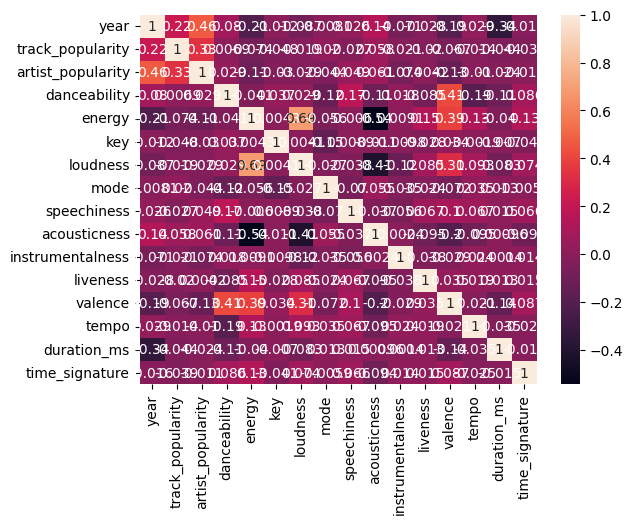

In [162]:
df_corr = df.corr(numeric_only=True)
sns.heatmap(df_corr, annot=True)


In [163]:
x = df.drop(['track_popularity'], axis=1, inplace=False)
y = df['track_popularity']
x.drop(['track_id', 'track_name', 'album', 'playlist_url', 'artist_id', 'artist_name'], axis=1, inplace=True)
x.head()

,year,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,2000,"['permanent wave', 'pop']",86,0.429,0.661,11.0,-7.227,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0,4.0
1,2000,"['alternative metal', 'modern rock', 'pop punk...",75,0.434,0.897,0.0,-4.918,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0,4.0
2,2000,"['contemporary country', 'country', 'country d...",61,0.529,0.496,7.0,-9.007,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0,4.0
3,2000,"['alternative metal', 'nu metal', 'post-grunge...",83,0.556,0.864,3.0,-5.870,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0,4.0
4,2000,"['boy band', 'dance pop', 'pop']",65,0.610,0.926,8.0,-4.843,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0,4.0


In [164]:
df['artist_genres'][1].count(',')

5

In [165]:
x.fillna(value=0, inplace=True)

In [166]:
def counter(seris):
    return seris.count(',') + 1

x['artist_genres'] = x['artist_genres'].apply(lambda y : counter(y))
x.head()

,year,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,2000,2,86,0.429,0.661,11.0,-7.227,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0,4.0
1,2000,6,75,0.434,0.897,0.0,-4.918,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0,4.0
2,2000,4,61,0.529,0.496,7.0,-9.007,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0,4.0
3,2000,5,83,0.556,0.864,3.0,-5.870,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0,4.0
4,2000,3,65,0.610,0.926,8.0,-4.843,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0,4.0


In [167]:
x

,year,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,2000,2,86,0.429,0.661,11.0,-7.227,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0,4.0
1,2000,6,75,0.434,0.897,0.0,-4.918,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0,4.0
2,2000,4,61,0.529,0.496,7.0,-9.007,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0,4.0
3,2000,5,83,0.556,0.864,3.0,-5.870,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0,4.0
4,2000,3,65,0.610,0.926,8.0,-4.843,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,2022,4,86,0.775,0.736,1.0,-8.072,0.0,0.2470,0.31900,0.001160,0.1270,0.362,100.988,239027.0,4.0
2296,2022,1,85,0.937,0.793,11.0,-4.431,0.0,0.1150,0.04530,0.000000,0.3410,0.794,106.022,172540.0,4.0
2297,2022,1,82,0.911,0.573,6.0,-7.430,1.0,0.2880,0.38000,0.000000,0.4030,0.972,140.040,97393.0,4.0
2298,2022,4,84,0.773,0.422,1.0,-4.572,0.0,0.1870,0.00783,0.006930,0.1290,0.488,77.502,136267.0,1.0


In [168]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [169]:
lm = LinearRegression()


In [170]:
lm.fit(x_train, y_train)

LinearRegression()

In [171]:
cdf = pd.DataFrame(lm.coef_, x.columns, columns=['Coeff'])
cdf

,Coeff
year,0.140807
artist_genres,0.238628
artist_popularity,0.291337
danceability,-0.311418
energy,-2.369879
key,-0.093314
loudness,0.140439
mode,0.690583
speechiness,-4.338933
acousticness,0.921631


In [172]:
x_test

,year,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
741,2007,5,78,0.435,0.887,9.0,-4.070,1.0,0.0636,0.000747,0.000000,0.0327,0.4080,199.935,212040.0,4.0
1917,2019,2,83,0.488,0.343,4.0,-8.985,1.0,0.0436,0.556000,0.000000,0.2100,0.0978,102.819,206459.0,4.0
208,2002,2,86,0.557,0.442,5.0,-7.224,1.0,0.0243,0.731000,0.000015,0.1100,0.2130,146.277,309600.0,4.0
1546,2015,5,68,0.746,0.873,7.0,-3.803,1.0,0.1280,0.024400,0.000000,0.3540,0.8170,148.075,222093.0,4.0
282,2002,3,75,0.777,0.852,11.0,-5.329,1.0,0.0295,0.029900,0.000498,0.1450,0.8770,125.994,208040.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,2000,1,54,0.597,0.793,7.0,-7.006,1.0,0.0361,0.012300,0.000005,0.1570,0.7550,167.200,243266.0,4.0
2083,2020,3,85,0.650,0.613,9.0,-6.130,0.0,0.1280,0.003360,0.000000,0.2670,0.0804,149.972,194621.0,4.0
2230,2022,1,73,0.410,0.611,4.0,-8.271,0.0,0.0467,0.022800,0.000000,0.1160,0.0899,185.727,184448.0,3.0
173,2001,4,58,0.675,0.775,4.0,-5.772,1.0,0.0522,0.038700,0.000000,0.3830,0.9330,99.945,217853.0,4.0


In [173]:
prediction = lm.predict(x_test)

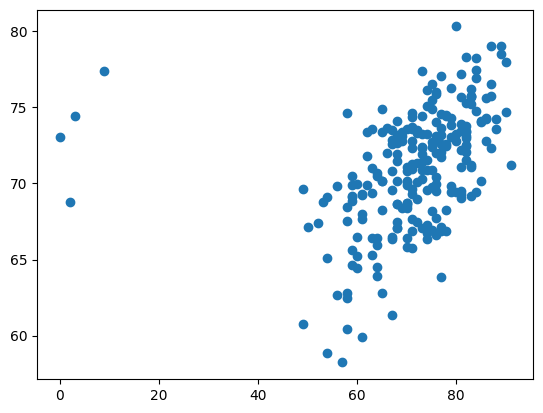

In [174]:
plt.scatter(y_test, prediction)

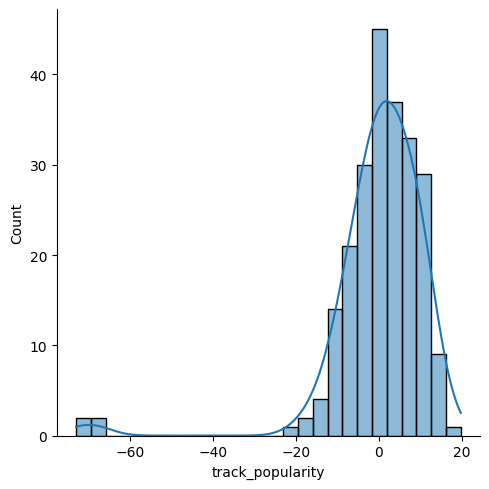

In [175]:
sns.displot((y_test-prediction), kde=True)

In [176]:
MAE = metrics.mean_absolute_error(y_test, prediction)
MSE = metrics.mean_squared_error(y_test, prediction)
RMSE = np.sqrt(MSE)

In [177]:
print(MAE, MSE, RMSE)

7.190648653652731 140.15564198363046 11.838734813468475


In [178]:
def ransac(mypoints, iteration, thresh):
    # Initializing iteration counter N, and return lists
    N = 0
    best_inliner_ = []
    best_outliner_ = []

    # Loop to apply algorithm N times to the data points (N epochs)
    while N < iteration:

        # Choosing three random values from given data set
        Chosen_Pts = random.sample(range(0, len(mypoints)), 3)
        x1 = mypoints[Chosen_Pts[0]][0]
        x2 = mypoints[Chosen_Pts[1]][0]
        x3 = mypoints[Chosen_Pts[2]][0]
        y1 = mypoints[Chosen_Pts[0]][1]
        y2 = mypoints[Chosen_Pts[1]][1]
        y3 = mypoints[Chosen_Pts[2]][1]

        # Applying the equation to find the parameter constants A, B, C
        A = (x3 * (y2 - y1) + x2 * (y1 - y3) + x1 * (y3 - y2)) / ((x1 - x2) * (x1 - x3) * (x2 - x3)+0.0000000001)
        B = (x3 * x3 * (y1 - y2) + x2 * x2 * (y3 - y1) + x1 * x1 * (y2 - y3)) / ((x1 - x2) * (x1 - x3) * (x2 - x3)+0.000000001)
        C = y1 - (A * x1 * x1) - (B * x1)

        # Initializing the list of inLiners and outLiners for each epoch
        inLiners = []
        outLiners = []

        # Finding if the point is inside the defined threshold
        for iii in range(len(mypoints)):
            xi = mypoints[iii][0]
            yi = mypoints[iii][1]
            Y_Yi = (A * xi * xi) + (B * xi) + C

            # If it is, then append it to the inLiners list
            if abs(Y_Yi - yi) <= thresh:
                inLiners.append((xi, yi))

            # If not, append to the outLiner list
            else:
                outLiners.append((xi, yi))

            # Checking if the this epoch generates better model or not
            if len(inLiners) > len(best_inliner_):
                # If it does, modify the best parameters and model related data
                best_outliner_ = outLiners
                best_inliner_ = inLiners
                best_parameter_ = [A, B, C]

        # Increment the counter
        N = N + 1

    # Assign the parameter values to constants to return
    alfa_ = best_parameter_[0]
    beta_ = best_parameter_[1]
    gama_ = best_parameter_[2]

    # Uncomment this if you want to print them
    # print(best_inliner_)
    # print(best_outliner_)
    # print(best_parameter_)

    # Returning values derived from this function in int, int, int, list, list format
    return alfa_, beta_, gama_, best_inliner_, best_parameter_

In [179]:
def plot_graph(equation, x_axis_length, label_str, linewidth='1.0'):
    x = np.array(x_axis_length)  # Creating 1D NP array with length of no. of Points
    y = eval(equation)  # Solving equation passed as a String(str)
    plt.plot(x, y, label=label_str, linewidth=linewidth)  # Plotting Graph

In [180]:
prediction_np = np.array(prediction)
y_test_np = np.array(y_test)
my_points = np.column_stack((y_test, prediction))
my_points

array([[73.        , 71.9046356 ],
       [83.        , 76.188089  ],
       [86.        , 74.24462287],
       [76.        , 69.51682644],
       [56.        , 69.85275461],
       [60.        , 66.48911375],
       [61.        , 69.26612237],
       [69.        , 72.76030291],
       [81.        , 69.04159334],
       [70.        , 73.59970226],
       [68.        , 73.17090425],
       [76.        , 72.00365171],
       [75.        , 66.97087522],
       [70.        , 68.5978107 ],
       [80.        , 80.30340342],
       [86.        , 74.27841831],
       [69.        , 68.3508937 ],
       [85.        , 74.06780446],
       [68.        , 71.95224847],
       [67.        , 72.56723213],
       [80.        , 73.2474841 ],
       [74.        , 66.33667079],
       [74.        , 76.14260092],
       [89.        , 78.47699545],
       [82.        , 71.51335047],
       [62.        , 71.82600882],
       [73.        , 74.43225145],
       [49.        , 69.64010622],
       [72.        ,

In [181]:
from scipy.optimize import curve_fit

def fit_func(x, a, b):
    return a*x + b

params = curve_fit(fit_func, my_points[0], my_points[1])

[a, b] = params[0]
print(a, b)

6.218853764754048 -370.9763248270455


c:\Users\m1568006\Desktop\Test_venv\.venv\Lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


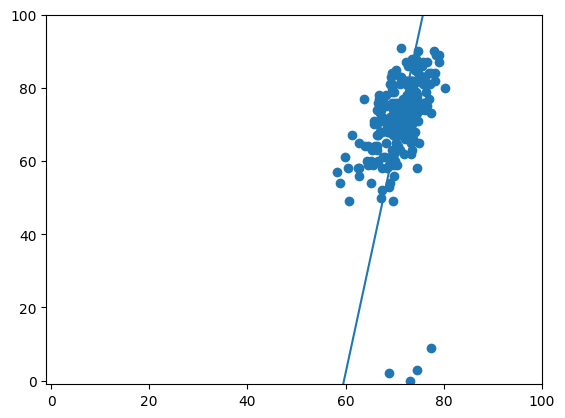

In [182]:
# Using RANSAC function to get the best-fit model
alfa, beta, gama, best_inliner, best_parameter = ransac(my_points, 25000, 5)
plt.xlim([-1, 100])
plt.ylim([-1, 100])
plt.scatter(prediction, y_test)
i=-370.9763248270455        # intercept
s=6.218853764754048         # slope
x=np.linspace(1,100,50)      # from 1 to 10, by 500
plt.plot(x, s*x + i)        # abline
# # Plotting graph based on RANSAC
# plot_graph('((alfa*(x**2))+(beta*x)+gama)', range(0, 100), 'RANSAC')

